# 1. Data Cleaning

## Step a & b: Load Dataset and Necessary Packages

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_excel("Strikers_performance.xlsx")

# Preview the data
df.head()


,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct
0,1,Spain,Left-footed,No,17.483571,10.778533,34.795488,0.677836,0.166241,0.757061,50.921924,71.806409,15.682532,30.412215,6.152481,0.820314,0.922727,8.570370,11.451388
1,2,France,Left-footed,Yes,14.308678,13.728250,31.472436,0.544881,0.192774,0.796818,61.396150,53.726866,19.843983,26.474913,6.093172,0.803321,0.678984,3.444638,8.243689
2,3,Germany,Left-footed,No,18.238443,3.804297,25.417413,0.518180,0.160379,0.666869,65.863945,60.452227,20.090084,24.164116,3.408714,0.766540,0.843858,8.429491,9.506835
3,4,France,Right-footed,No,22.615149,9.688908,20.471443,0.599663,0.184602,0.638776,88.876877,60.511979,22.363152,44.129989,6.339820,0.611798,0.662997,6.532552,8.199653
4,5,France,Left-footed,Yes,13.829233,6.048072,29.887563,0.582982,0.105319,0.591485,75.565531,54.982158,13.165708,37.859323,8.465658,0.701638,0.906538,8.414915,6.665333


## Step c: Check for Missing Values and Impute Them

In [ ]:
# Check missing values
print("Missing Values:\n", df.isnull().sum())

# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Impute numeric columns with median
imputer_median = SimpleImputer(strategy='median')
df[numeric_cols] = imputer_median.fit_transform(df[numeric_cols])

# Impute categorical columns with most frequent
imputer_freq = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer_freq.fit_transform(df[categorical_cols])

# Confirm no missing values
print("\nMissing Values after Imputation:\n", df.isnull().sum())


Missing Values:
 Striker_ID                    0
Nationality                   0
Footedness                    0
Marital Status                0
Goals Scored                  0
Assists                       0
Shots on Target               0
Shot Accuracy                 0
Conversion Rate               0
Dribbling Success             0
Movement off the Ball         6
Hold-up Play                  0
Aerial Duels Won              0
Defensive Contribution        0
Big Game Performance          2
Consistency                   0
Penalty Success Rate          5
Impact on Team Performance    0
Off-field Conduct             0
dtype: int64

Missing Values after Imputation:
 Striker_ID                    0
Nationality                   0
Footedness                    0
Marital Status                0
Goals Scored                  0
Assists                       0
Shots on Target               0
Shot Accuracy                 0
Conversion Rate               0
Dribbling Success             0
Movemen

## d: Check and Assign Integer Types for Specific Columns

In [ ]:
# Convert specific columns to integer type
int_columns = [
    'Goals Scored', 'Assists', 'Shots on Target', 
    'Movement off the Ball', 'Hold-up Play', 'Aerial Duels Won', 
    'Defensive Contribution', 'Big Game Performance', 
    'Impact on Team Performance', 'Off-field Conduct'
]

# Convert each column
for col in int_columns:
    df[col] = df[col].astype(int)

# Check data types
df[int_columns].dtypes


Goals Scored                  int64
Assists                       int64
Shots on Target               int64
Movement off the Ball         int64
Hold-up Play                  int64
Aerial Duels Won              int64
Defensive Contribution        int64
Big Game Performance          int64
Impact on Team Performance    int64
Off-field Conduct             int64
dtype: object

# 2. Descriptive Analysis

## 2a: Descriptive Analysis (Rounded to 2 Decimal Points)

In [ ]:
# Perform descriptive statistics and round to 2 decimal places
desc_stats = df.describe().round(2)

# Display the results
desc_stats


,Striker_ID,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct
count,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00
mean,250.50,14.52,7.60,25.26,0.60,0.20,0.70,69.28,59.33,19.04,39.47,6.43,0.74,0.80,6.52,7.57
std,144.48,4.91,2.96,7.08,0.10,0.05,0.10,10.33,10.15,4.95,9.90,1.98,0.10,0.10,2.11,2.09
min,1.00,0.00,0.00,4.00,0.31,0.05,0.40,40.00,35.00,4.00,8.00,2.00,0.46,0.53,0.00,0.00
25%,125.75,11.00,6.00,20.00,0.54,0.17,0.64,62.00,52.00,16.00,33.00,5.00,0.68,0.72,5.00,6.00
50%,250.50,15.00,8.00,25.00,0.60,0.20,0.70,69.00,60.00,19.00,39.50,6.00,0.75,0.80,6.50,8.00
75%,375.25,18.00,9.00,30.00,0.67,0.23,0.76,76.00,66.00,22.00,46.00,8.00,0.81,0.87,8.00,9.00
max,500.00,34.00,15.00,43.00,0.92,0.36,1.00,98.00,92.00,34.00,71.00,12.00,1.00,1.00,13.00,13.00


# 3. Data Visualization

## 3a: Percentage Analysis & Pie Chart for Footedness

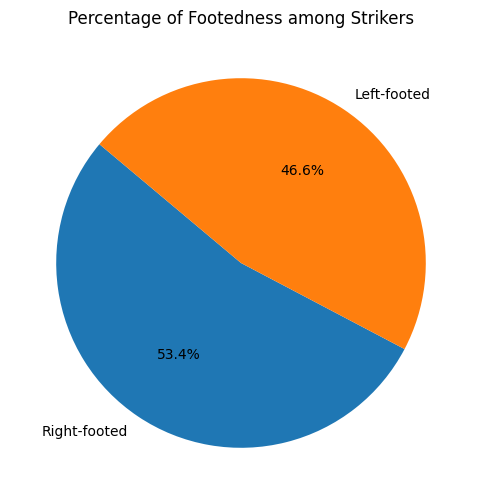

In [ ]:
import matplotlib.pyplot as plt

# Percentage analysis
footedness_counts = df['Footedness'].value_counts(normalize=True) * 100
footedness_counts = footedness_counts.round(2)

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(footedness_counts, labels=footedness_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Footedness among Strikers')
plt.show()


## 3b: Countplot for Footedness across Nationalities

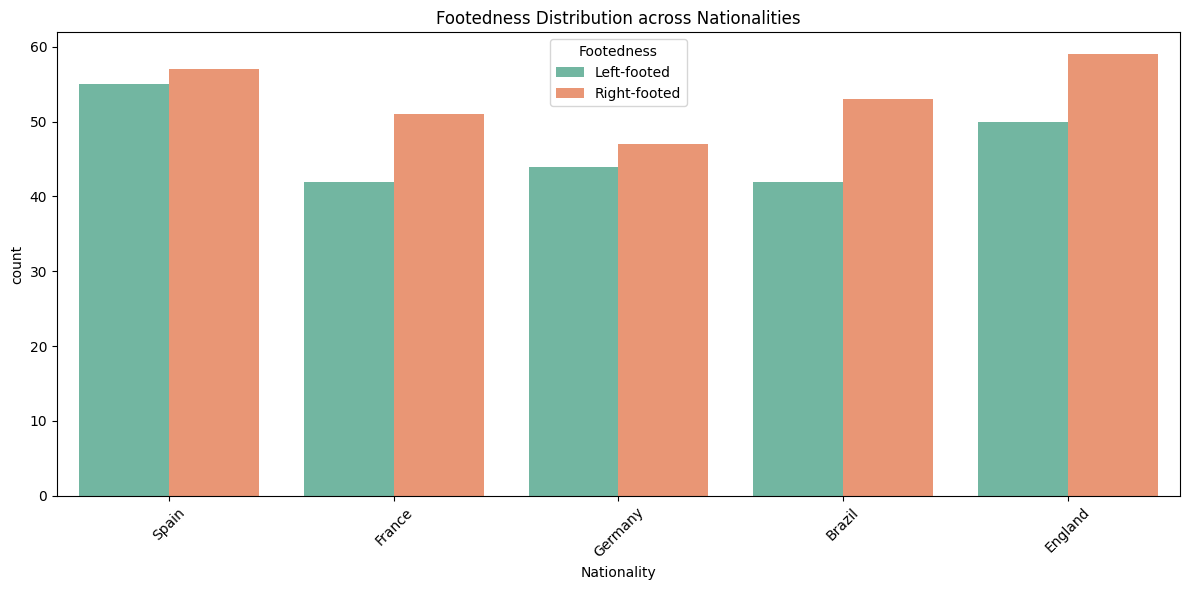

In [ ]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Nationality', hue='Footedness', palette='Set2')
plt.title('Footedness Distribution across Nationalities')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 4. Statistical Analysis

## 4a. Nationality with Highest Average Goals Scored

In [36]:
avg_goals_by_nation = df.groupby('Nationality')['Goals Scored'].mean().sort_values(ascending=False).round(2)
print("Average Goals by Nationality:\n", avg_goals_by_nation)
print("\nNationality with highest average goals scored:", avg_goals_by_nation.idxmax())


Average Goals by Nationality:
 Nationality
Brazil     15.32
Spain      14.69
France     14.41
Germany    14.35
England    13.90
Name: Goals Scored, dtype: float64

Nationality with highest average goals scored: Brazil


## 4b. Average Conversion Rate by Footedness

In [37]:
avg_conversion_by_foot = df.groupby('Footedness')['Conversion Rate'].mean().round(2)
print("Average Conversion Rate by Footedness:\n", avg_conversion_by_foot)


Average Conversion Rate by Footedness:
 Footedness
Left-footed     0.2
Right-footed    0.2
Name: Conversion Rate, dtype: float64


## 4c. Significant Difference in Consistencys Among Nationalities

### Step 1: Check Assumptions
#### Normality (Shapiro-Wilk Test)

#### Homogeneity of Variance (Levene's Test)

In [38]:
from scipy.stats import shapiro, levene, f_oneway, kruskal

# Sample groups
groups = [group['Consistency'].dropna() for name, group in df.groupby('Nationality') if len(group) >= 3]

# Normality
for i, group in enumerate(groups):
    stat, p = shapiro(group)
    print(f'Group {i+1} Shapiro-Wilk p-value: {p:.4f}')

# Homogeneity
stat, p = levene(*groups)
print(f'Levene’s Test p-value: {p:.4f}')


Group 1 Shapiro-Wilk p-value: 0.7303
Group 2 Shapiro-Wilk p-value: 0.9730
Group 3 Shapiro-Wilk p-value: 0.4209
Group 4 Shapiro-Wilk p-value: 0.9636
Group 5 Shapiro-Wilk p-value: 0.6273
Levene’s Test p-value: 0.8084


### Step 2: Appropriate Test
#### If assumptions met: ANOVA
#### If not: Kruskal-Wallis

In [39]:
# If normal & homoscedastic:
stat, p = f_oneway(*groups)
print(f'ANOVA p-value: {p:.4f}')

# If not normal or not equal variance:
stat, p = kruskal(*groups)
print(f'Kruskal-Wallis p-value: {p:.4f}')


ANOVA p-value: 0.1928
Kruskal-Wallis p-value: 0.1366


## 4d. Correlation between Hold-up Play and Consistency

### Step 1: Assumptions

In [40]:
# Shapiro tests
shapiro_hold = shapiro(df['Hold-up Play'])
shapiro_consist = shapiro(df['Consistency'])
print("Hold-up Play Normal:", shapiro_hold.pvalue > 0.05)
print("Consistency Rate Normal:", shapiro_consist.pvalue > 0.05)


Hold-up Play Normal: True
Consistency Rate Normal: True


### Step 2: Correlation Test
#### Pearson: if both normal
#### Spearman: otherwise

In [41]:
from scipy.stats import pearsonr, spearmanr

# Choose appropriate test
if shapiro_hold.pvalue > 0.05 and shapiro_consist.pvalue > 0.05:
    corr, p = pearsonr(df['Hold-up Play'], df['Consistency'])
    method = "Pearson"
else:
    corr, p = spearmanr(df['Hold-up Play'], df['Consistency'])
    method = "Spearman"

print(f"{method} Correlation: {corr:.2f}, p-value: {p:.4f}")


Pearson Correlation: 0.15, p-value: 0.0010


## 4e. Regression: Does Hold-up Play Predict Consistency Rate?

In [42]:
import statsmodels.api as sm


X = df[['Hold-up Play']]
y = df['Consistency']
X = sm.add_constant(X)  # Add intercept

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            Consistency   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     10.93
Date:                Mon, 12 May 2025   Prob (F-statistic):            0.00101
Time:                        13:07:17   Log-Likelihood:                 429.97
No. Observations:                 500   AIC:                            -855.9
Df Residuals:                     498   BIC:                            -847.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.6548      0.027     24.031   

# 5. Feature Engineering

## 5a. Create a New Feature – Total contribution score


In [43]:
df['Total Contribution Score'] = (
    df['Goals Scored'] +
    df['Assists'] +
    df['Shots on Target'] +
    df['Dribbling Success'] +
    df['Aerial Duels Won'] +
    df['Defensive Contribution'] +
    df['Big Game Performance'] +
    df['Consistency']  # assuming 'Consistency' refers to this column
)
df['Total Contribution Score'] = df['Total Contribution Score'].round(2)
print(df[['Total Contribution Score']].head())


   Total Contribution Score
0                    113.58
1                    110.60
2                     94.43
3                    124.25
4                    107.29


## 5b. Encode Footedness and Marital Status using LabelEncoder

In [44]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Footedness_encoded'] = le.fit_transform(df['Footedness'])
df['Marital Status_encoded'] = le.fit_transform(df['Marital Status'])

print(df[['Footedness', 'Footedness_encoded', 'Marital Status', 'Marital Status_encoded']].head())


     Footedness  Footedness_encoded Marital Status  Marital Status_encoded
0   Left-footed                   0             No                       0
1   Left-footed                   0            Yes                       1
2   Left-footed                   0             No                       0
3  Right-footed                   1             No                       0
4   Left-footed                   0            Yes                       1


## 5c. Create Dummy Variables for Nationality

In [45]:
nationality_dummies = pd.get_dummies(df['Nationality'], prefix='Nationality', drop_first=True)
df = pd.concat([df, nationality_dummies], axis=1)

print(nationality_dummies.head())


   Nationality_England  Nationality_France  Nationality_Germany  \
0                False               False                False   
1                False                True                False   
2                False               False                 True   
3                False                True                False   
4                False                True                False   

   Nationality_Spain  
0               True  
1              False  
2              False  
3              False  
4              False  


# 6. Clustering Analysis:

## 6a. KMeans Clustering

### i. Drop Striker_ID from the updated dataset and select features

In [46]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Drop Striker_ID and non-numeric columns (if any)
X = df.drop(['Striker_ID'], axis=1)

# Keep only numeric features
X_numeric = X.select_dtypes(include=['int64', 'float64'])

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)


### ii. Calculate WCSS

In [47]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


### iii. Visualize the Elbow Chart (Expect breakpoint at 2)


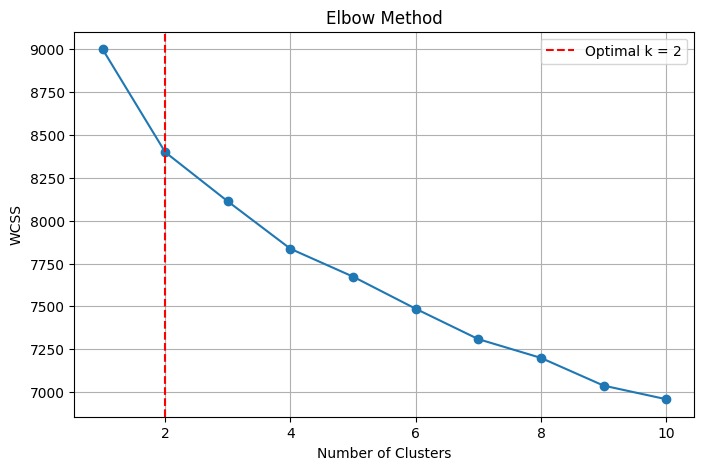

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.axvline(x=2, color='r', linestyle='--', label='Optimal k = 2')
plt.legend()
plt.show()


### iv. Build KMeans model with k=2 and add cluster labels

In [49]:
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


## 6b. Average Total Contribution Score by cluster

In [50]:
avg_score_by_cluster = df.groupby('Cluster')['Total Contribution Score'].mean()
print(avg_score_by_cluster)


Cluster
0    102.302467
1    123.286996
Name: Total Contribution Score, dtype: float64


## 6c. Add Strikers types column and drop Cluster

In [51]:
df['Strikers types'] = df['Cluster'].map({0: 'Best strikers', 1: 'Regular strikers'})
df.drop('Cluster', axis=1, inplace=True)


## 6d. Feature mapping: map Strikers types to binary

In [52]:
df['Strikers types binary'] = df['Strikers types'].map({'Best strikers': 1, 'Regular strikers': 0})
print(df[['Strikers types', 'Strikers types binary']].head())


     Strikers types  Strikers types binary
0  Regular strikers                      0
1  Regular strikers                      0
2     Best strikers                      1
3  Regular strikers                      0
4     Best strikers                      1


# 7. Machine Learning Model

## 7a. Select X and y


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and target
# Drop non-numeric columns explicitly if not already encoded
X = df.drop(['Striker_ID', 'Strikers types', 'Strikers types binary', 'Nationality', 'Footedness', 'Marital Status'], axis=1)
y = df['Strikers types binary']



## 7b. Feature scaling and train-test split


In [56]:
# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


##  7c. Build Logistic Regression Model

In [57]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

## 7d. Make predictions and calculate accuracy

In [58]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Accuracy: {accuracy:.2f}%")


Accuracy: 97.00%


## 7e. Create and visualize confusion matrix

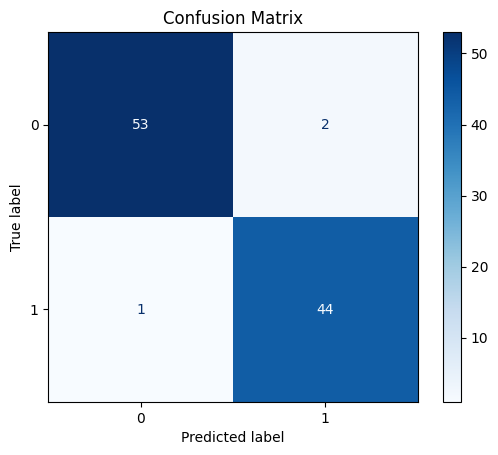

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()
